In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df1 = pd.read_csv('june82019.txt')#June 8 2019 is the last day of the collection period
df2 = pd.read_csv('june12019.txt')
df3 = pd.read_csv('may252019.txt')
df4 = pd.read_csv('may182019.txt')
df5 = pd.read_csv('may112019.txt')
df6 = pd.read_csv('may42019.txt')

In [22]:
six_weeks_df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

In [23]:
six_weeks_df['DATETIME'] = six_weeks_df['DATE'] + ' ' + six_weeks_df['TIME']

In [24]:
six_weeks_df['DATETIME'] = pd.to_datetime(six_weeks_df['DATETIME'])

In [26]:
six_weeks_df['DAY_OF_WEEK'] = six_weeks_df['DATETIME'].dt.day_name()

In [27]:
six_weeks_df = six_weeks_df.loc[six_weeks_df['ENTRIES'].apply(lambda x: x > 5000)]

In [31]:
six_weeks_df2 = six_weeks_df[['C/A', 'UNIT', 'SCP', 'STATION','DATE', 'DATETIME', 'ENTRIES', 'DAY_OF_WEEK']]

In [42]:
six_weeks_df2.head()

,C/A,UNIT,SCP,STATION,DATE,DATETIME,ENTRIES,DAY_OF_WEEK
0,A002,R051,02-00-00,59 ST,06/01/2019,2019-06-01 00:00:00,7080105,Saturday
1,A002,R051,02-00-00,59 ST,06/01/2019,2019-06-01 04:00:00,7080137,Saturday
2,A002,R051,02-00-00,59 ST,06/01/2019,2019-06-01 08:00:00,7080161,Saturday
3,A002,R051,02-00-00,59 ST,06/01/2019,2019-06-01 12:00:00,7080276,Saturday
4,A002,R051,02-00-00,59 ST,06/01/2019,2019-06-01 16:00:00,7080520,Saturday


In [49]:
six_weeks_df2_sorted = six_weeks_df2.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DAY_OF_WEEK'], as_index=False).max()

In [53]:
top_stations = six_weeks_df2_sorted.groupby(['STATION'], as_index=False).sum()
top_25_stations= top_stations.sort_values(by=['ENTRIES'], ascending = False)
top_25_stations.head()

,STATION,ENTRIES
68,42 ST-PORT AUTH,53294516782
9,125 ST,46180969365
352,TIMES SQ-42 ST,41056513095
46,23 ST,39588261083
55,3 AV-149 ST,36243231619


In [ ]:
six_weeks_df2 = six_weeks_df2.groupby(['STATION']).sum()

In [46]:
six_weeks_df2

,C/A,UNIT,SCP,STATION,DATE,DATETIME,ENTRIES,DAY_OF_WEEK
0,A002,R051,02-00-00,59 ST,06/01/2019,2019-06-01 00:00:00,7080105,Saturday
1,A002,R051,02-00-00,59 ST,06/01/2019,2019-06-01 04:00:00,7080137,Saturday
2,A002,R051,02-00-00,59 ST,06/01/2019,2019-06-01 08:00:00,7080161,Saturday
3,A002,R051,02-00-00,59 ST,06/01/2019,2019-06-01 12:00:00,7080276,Saturday
4,A002,R051,02-00-00,59 ST,06/01/2019,2019-06-01 16:00:00,7080520,Saturday
5,A002,R051,02-00-00,59 ST,06/01/2019,2019-06-01 20:00:00,7080817,Saturday
6,A002,R051,02-00-00,59 ST,06/02/2019,2019-06-02 00:00:00,7081001,Sunday
7,A002,R051,02-00-00,59 ST,06/02/2019,2019-06-02 04:00:00,7081021,Sunday
8,A002,R051,02-00-00,59 ST,06/02/2019,2019-06-02 08:00:00,7081035,Sunday
9,A002,R051,02-00-00,59 ST,06/02/2019,2019-06-02 12:00:00,7081119,Sunday


In [47]:
six_weeks_df2_filtered = six_weeks_df2.loc[six_weeks_df2['ENTRIES'].apply(lambda x: x > 10000 and x < 1000000)]

In [48]:
six_weeks_df2_filtered.head()

,C/A,UNIT,SCP,STATION,DATE,DATETIME,ENTRIES,DAY_OF_WEEK
462,A002,R051,02-06-00,59 ST,06/01/2019,2019-06-01 00:00:00,212124,Saturday
463,A002,R051,02-06-00,59 ST,06/01/2019,2019-06-01 04:00:00,212146,Saturday
464,A002,R051,02-06-00,59 ST,06/01/2019,2019-06-01 08:00:00,212170,Saturday
465,A002,R051,02-06-00,59 ST,06/01/2019,2019-06-01 12:00:00,212278,Saturday
466,A002,R051,02-06-00,59 ST,06/01/2019,2019-06-01 16:00:00,212468,Saturday


In [67]:
sixweekstations = six_weeks_df2.groupby(['C/A', 'UNIT', 'STATION']).sum()
sixweekstations_sorted = sixweekstations.sort_values(by=['ENTRIES'], ascending = False)
top_25 = sixweekstations_sorted.head(25)
top_25

,,,ENTRIES
C/A,UNIT,STATION,
N063A,R011,42 ST-PORT AUTH,1305219539517
R288,R275,183 ST,953438233610
N325A,R218,ELMHURST AV,811299356366
R311,R053,3 AV-149 ST,802675752415
J034,R007,104 ST,795788132555
A077,R028,FULTON ST,788762743323
N100,R252,HIGH ST,729221032409
R646,R110,FLATBUSH AV-B.C,728979254580
R161A,R452,72 ST,703302918600


Text(0.5, 1.0, 'Total Ridership')

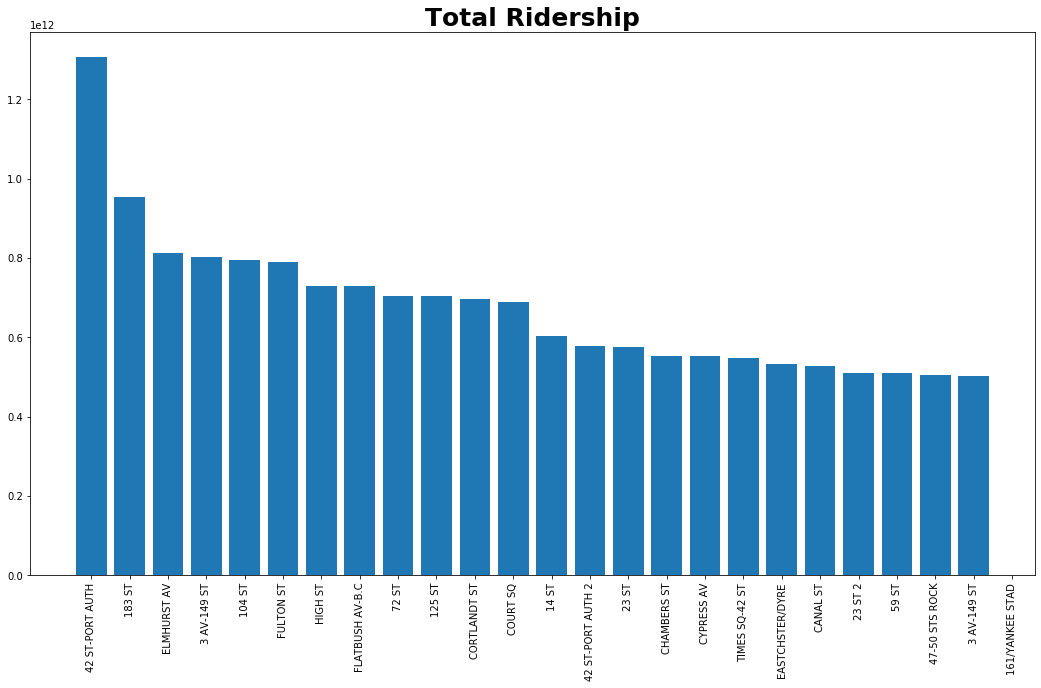

In [55]:
top_25list = top_25['ENTRIES'].tolist()
stations = ['42 ST-PORT AUTH', '183 ST', 'ELMHURST AV', '3 AV-149 ST', '104 ST', 'FULTON ST', 'HIGH ST', 'FLATBUSH AV-B.C', '72 ST', '125 ST', 'CORTLANDT ST', 'COURT SQ', '14 ST', '42 ST-PORT AUTH 2', '23 ST', 'CHAMBERS ST', 'CYPRESS AV', 'TIMES SQ-42 ST', 'EASTCHSTER/DYRE', 'CANAL ST', '23 ST 2', '59 ST', '47-50 STS ROCK', '3 AV-149 ST', '161/YANKEE STAD']
plt.figure(figsize=(18,10))
ticks_x = np.linspace(0,25,26)
plt.xticks(ticks_x, stations, rotation=90) 
plt.bar(stations,top_25list)
plt.title('Total Ridership', fontsize='25', weight='bold')

In [52]:
len(top_25list)

25